In [1]:
# Lertas Giorgos 

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

from platform import python_version
python_version()

'3.8.13'

### 1. Interractions dataframe

In [2]:
# read file with interractions and remove column with side effect polypharmacy code, because we have the names
combo=pd.read_csv('data/bio-decagon-combo.csv')
combo2 = combo.drop('Polypharmacy Side Effect', axis=1)

# Also, replace blank spaces, in names, with underscore
combo2['Side Effect Name'] = combo2['Side Effect Name'].str.replace(' ','_')
combo2

,STITCH 1,STITCH 2,Side Effect Name
0,CID000002173,CID000003345,hypermagnesemia
1,CID000002173,CID000003345,retinopathy_of_prematurity
2,CID000002173,CID000003345,atelectasis
3,CID000002173,CID000003345,alkalosis
4,CID000002173,CID000003345,Back_Ache
...,...,...,...
4649436,CID000003461,CID000003954,deep_vein_thromboses
4649437,CID000003461,CID000003954,rhabdomyolysis
4649438,CID000003461,CID000003954,loss_of_weight
4649439,CID000003461,CID000003954,ascites


,Side Effect Name
arterial_pressure_NOS_decreased,28568
anaemia,27006
Difficulty_breathing,26037
nausea,25190
neumonia,24430
Fatigue,24260
Pain,23894
diarrhea,23848
asthenia,23515
emesis,23043


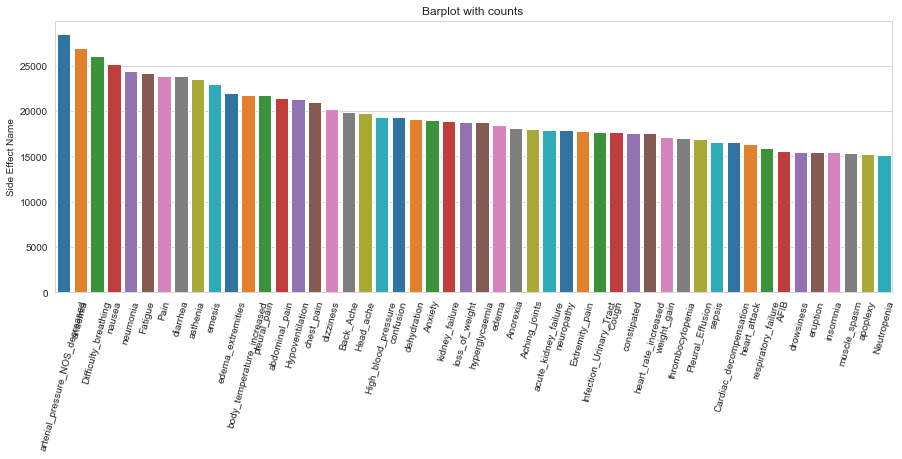

In [3]:
# counter of values at Side Effect Name column 
count_effects = pd.DataFrame(combo2['Side Effect Name'].value_counts())

# create a barplot with counts
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title('Barplot with counts ')
sns.barplot(x=count_effects.head(50).index, y='Side Effect Name', data=count_effects.head(50), palette='tab10')
plt.xticks(rotation=75);

# print leaderbord with names
count_effects[:15]

In [4]:
# create graph and print leaderboard with entities how many times they appear
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(combo2, 'STITCH 1', 'STITCH 2', True)

leaderboard = {}
df = pd.concat([combo2['STITCH 1'],combo2['STITCH 2']]).unique()
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
leaderboard = s.to_frame().sort_values('connections', ascending=False)

# print leaderbord with names
leaderboard[:20]

# print graph
# from matplotlib.pyplot import figure
# figure(figsize=(10, 8))
# nx.draw_shell(G, with_labels=True)

,connections
CID000004594,599
CID000001983,578
CID000000853,576
CID000003883,552
CID000005039,549
CID000003958,544
CID000005732,537
CID000004679,537
CID000054454,537
CID000002771,536


In [5]:
# leaderbord with unique interactions how many times they appear 
inters = combo2[['STITCH 1','STITCH 2']].groupby(['STITCH 1', 'STITCH 2']).value_counts()
inters = pd.DataFrame(inters)
inters.columns = ['connections']
inters.sort_values('connections', ascending=False)[:20]

,,connections
STITCH 1,STITCH 2,
CID000003883,CID000004594,540
CID000002662,CID000003883,524
CID000004594,CID000005090,494
CID000005090,CID000005732,478
CID000002662,CID000003446,476
CID000002678,CID000004900,468
CID000003958,CID000005090,466
CID000004900,CID000005090,465
CID000002662,CID000004900,462


### 2. Disease Classes dataframe

In [6]:
# read file with subcategories, which called Disease class
effectcategories=pd.read_csv('data/bio-decagon-effectcategories.csv')
effectcategories

,Side Effect,Side Effect Name,Disease Class
0,C0017152,gastric inflammation,gastrointestinal system disease
1,C0027858,neuroma,benign neoplasm
2,C0041466,Typhoid,bacterial infectious disease
3,C0032807,Post thrombotic syndrome,cardiovascular system disease
4,C0033860,psoriasis,integumentary system disease
...,...,...,...
556,C0001816,agnosia,developmental disorder of mental health
557,C0302592,carcinoma of the cervix,cancer
558,C0270629,epidural abscess,nervous system disease
559,C0038220,status epilepticus,nervous system disease


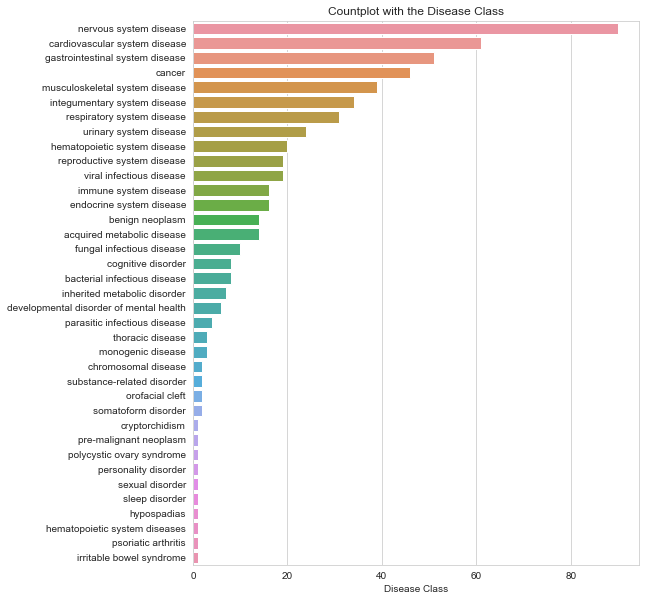

In [7]:
# counter of values at Disease Class column 
count_eff_cat = pd.DataFrame(effectcategories['Disease Class'].value_counts())

# Create a count chart
plt.figure(figsize=(8,10))
plt.title('Countplot with the Disease Class')
sns.barplot(x='Disease Class',y=count_eff_cat.index,data=count_eff_cat);

In [8]:
# merge file with connections with Disease class
combo2.merge(effectcategories, on='Side Effect Name').drop('Side Effect',axis=1)

,STITCH 1,STITCH 2,Side Effect Name,Disease Class
0,CID000002173,CID000003345,peliosis,hematopoietic system disease
1,CID000001302,CID000005064,peliosis,hematopoietic system disease
2,CID000002520,CID000060852,peliosis,hematopoietic system disease
3,CID000000596,CID000667490,peliosis,hematopoietic system disease
4,CID000005245,CID000005656,peliosis,hematopoietic system disease
...,...,...,...,...
827867,CID000004205,CID000034312,Rubella,viral infectious disease
827868,CID000004900,CID000005090,Rubella,viral infectious disease
827869,CID000002554,CID000028112,Rubella,viral infectious disease
827870,CID000004112,CID000004900,Rubella,viral infectious disease


### 3. Export files

In [9]:
import os 

path = '/Users/giorgoslertas/Desktop/Lertas_files/data_science/Thesis/ddi_pred'
os.chdir(path)    # os.getcwd() current working file

# create train, test and valid 
# train=combo2.sample(frac=0.8)
# test=combo2.drop(list(train.index.values), axis=0)
# valid=test.sample(frac=0.5)
# test=test.drop(list(valid.index.values), axis=0)

# extract train file as text
combo2.to_csv('dgl-ke/train.txt', header=None, index=None, sep=',')
# test.to_csv('test.txt', header=None, index=None, sep=',')
# valid.to_csv('valid.txt', header=None, index=None, sep=',')

# relations = pd.DataFrame(combo2['Side Effect Name'].unique())
# entities = pd.DataFrame(pd.concat([combo2['STITCH 1'],combo2['STITCH 2']]).unique())
# relations.to_csv('relations.txt', header=None, sep=',')
# entities.to_csv('entities.txt', header=None, sep=',')

####extra

--log_interval 1000 \
--neg_sample_size 200 --regularization_coef = 1e-9 --hidden_dim 400 --gamma 19,9 \
--lr 0,25 --batch_size_eval 16 --test -adv --gpu 0 --max_step 24000

In [10]:
import json
  
# Opening json file
f = open('ckpts/TransE_ddi_pr_0/config.json')
  
# returns json object as a dictionary
model = json.load(f)
model

{'dataset': 'ddi_pr',
 'model': 'TransE',
 'emb_size': 400,
 'max_train_step': 80000,
 'batch_size': 1024,
 'neg_sample_size': 256,
 'lr': 0.01,
 'gamma': 12.0,
 'double_ent': False,
 'double_rel': False,
 'neg_adversarial_sampling': False,
 'adversarial_temperature': 1.0,
 'regularization_coef': 2e-06,
 'regularization_norm': 3,
 'emap_file': 'entities.tsv',
 'rmap_file': 'relations.tsv'}

In [11]:
# 1. Select rows with top 5 relations    # 131.231
top5 = combo2[combo2['Side Effect Name'].isin(['arterial_pressure_NOS_decreased','anaemia',
                                               'Difficulty_breathing','nausea','neumonia'])]
# 2. find number of unique rows        # 54.449
top5_uni = top5[['STITCH 1','STITCH 2']].drop_duplicates()
# 3. sampling                       # 5.445
top5_sample = top5_uni.sample(frac=0.1)
# 4. create X, Y
X_names = top5_sample.copy()
Y = [combo2['Side Effect Name'].iloc[i] for i in top5_sample.index]   # list with target values for each row in X

In [12]:
# read files with embeddings, that export with the code in cmd
entities_emb = np.load('ckpts/TransE_ddi_pr_0/ddi_pr_TransE_entity.npy')
relations_emb = np.load('ckpts/TransE_ddi_pr_0/ddi_pr_TransE_relation.npy')

Embeddings :

entities.shape
(645, 400)

relations.shape
(1317, 400)

In [13]:
# read files with names, that export with the code in cmd
entities = pd.read_csv('dgl-ke/entities.tsv', names = ['names'], index_col=None)
relations = pd.read_csv('dgl-ke/relations.tsv', names = ['names'], index_col=None)

In [14]:
# for each target in Y, add the embeddings from the exported file of dgl-ke
Y_emb = [relations_emb[relations.loc[relations.names == i].index] for i in Y]

# for each drug, add embeddings from the exported file of dgl-ke
X1 = [entities_emb[entities.loc[entities.names == i].index] for i in X_names['STITCH 1']]
X2 = [entities_emb[entities.loc[entities.names == i].index] for i in X_names['STITCH 2']]

In [15]:
np.shape(Y_emb)

(5445, 1, 400)

In [16]:
# reshape all to 2d matrix
Y_emb = np.reshape(Y_emb, (5445, 400))
X1 = np.reshape(X1, (5445, 400))
X2 = np.reshape(X2, (5445, 400))

In [17]:
# create X values with concatenation of 2 files with interracted drugs 
X = [np.concatenate([sub1,sub2]) for sub1, sub2 in zip(X1, X2)]

In [18]:
np.shape(X)

(5445, 800)

In [19]:
pd.DataFrame(np.transpose(X))

,0,1,2,3,4,5,6,7,8,9,...,5435,5436,5437,5438,5439,5440,5441,5442,5443,5444
0,-0.116360,0.424398,-0.350560,-0.476619,0.593795,-0.208003,-0.276999,0.113193,0.187318,-0.518980,...,-0.229449,0.609657,-0.344022,-0.400421,-0.495776,0.424398,0.231394,0.239237,0.373502,0.508745
1,0.450025,0.432157,0.478454,0.480224,-0.524143,-0.202796,0.364353,-0.229629,0.514004,-0.338150,...,0.368328,0.452575,0.148369,0.340251,0.455717,0.432157,0.343170,0.054545,0.216926,0.080338
2,-0.437332,-0.351186,-0.489105,-0.469689,-0.074168,0.179136,-0.379794,-0.481072,-0.410924,-0.009823,...,-0.428209,-0.478845,-0.264287,-0.441338,0.379201,-0.351186,0.390043,0.455619,0.127350,-0.492397
3,-0.599229,0.375498,-0.589359,0.609936,-0.586949,0.054943,0.005212,-0.425663,-0.045881,0.659652,...,0.393830,-0.706886,-0.716336,-0.287436,0.549130,0.375498,-0.723735,0.302463,-0.174065,-0.463411
4,0.549738,-0.614222,0.550155,0.547058,-0.229030,0.792894,-0.418332,0.734366,0.351506,-0.333915,...,0.583526,0.543251,0.281374,0.360210,-0.220012,-0.614222,-0.359567,-0.542100,0.541159,0.453164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.558706,-0.581484,0.352689,0.028888,0.473309,-0.560019,0.410520,0.465988,-0.435129,0.312246,...,0.462391,0.473309,0.401168,0.187403,-0.236646,0.300072,0.174619,0.389653,-0.309705,-0.526467
796,-0.370990,-0.230641,-0.082354,-0.286081,0.560926,0.462959,-0.115993,0.494648,-0.076646,-0.411303,...,0.345534,0.560926,-0.378642,-0.575745,-0.279553,0.479978,0.327324,-0.435906,0.468522,0.302231
797,-0.214400,-0.446426,-0.327556,-0.470628,-0.351448,0.507041,-0.511088,-0.587677,-0.424668,0.297888,...,0.184125,-0.351448,-0.425663,0.566697,-0.403454,-0.448180,-0.469850,-0.110467,-0.385030,0.360961
798,-0.225874,-0.566715,-0.379682,0.393970,0.453213,0.592736,-0.519963,-0.307835,-0.321942,-0.555028,...,-0.357030,0.453213,0.476730,-0.456562,-0.362118,0.475008,-0.037769,-0.452934,0.408369,0.449924


### 4. Biobert